In [1]:
# ---------------------------------------
# Simple model of pi manifold of graphene
# ---------------------------------------

from __future__ import print_function # python3 style print
from pythtb import * # import TB model class

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]

# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

In [3]:
# make 2D tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

In [4]:
# set model parameters
delta=0.0
t=-1.0
my_model.set_onsite([-delta,delta])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

In [5]:
# print out model details
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -0.0
 #  1  ===>       0.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774



In [6]:
# list of k-point nodes and their labels defining the path for the
#   band structure plot
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')

In [7]:
# construct the k-path
nk=121
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.     ]
 [0.5     0.28868]
 [0.      0.     ]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.57735  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.57735]
node index list:    [  0  51  76 120]
----- k_path report end ------------



In [8]:
# solve for eigenvalues at each point on the path
evals=my_model.solve_all(k_vec)

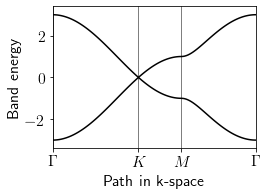

In [9]:
# generate band structure plot

fig, ax = plt.subplots(figsize=(4.,3.))
# specify horizontal axis details
ax.set_xlim([0,k_node[-1]])
ax.set_ylim([-3.4,3.4])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put titles
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second bands
ax.plot(k_dist,evals[0],color='k')
ax.plot(k_dist,evals[1],color='k')

# save figure as a PDF
fig.tight_layout()
#fig.savefig("graphene.pdf")

plt.show()